In [1]:
# Convex Optimization
# Tutorial 8
# Road Gradient

import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt
from math import sin, pi


The minimum overall cost for construction is 7587.9421794659565.



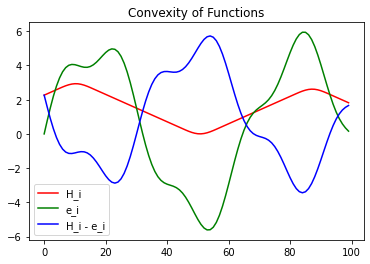

In [2]:
n = 100
H = cp.Variable(n)
e = []
for i in range(n): e.append(5*sin(i*3*pi/100) + sin(i*10*pi/100))
u = H - e

D1 = 0.08   # maximum allowable slope
D2 = 0.025  # maximum allowable curvature
D3 = 0.005  # maxium allowable third derivative

def fill(u): return 2*pow(cp.pos(u), 2) + 30*cp.pos(u)

def cut(u): return 12*pow(cp.neg(u), 2) + cp.neg(u)

slope = cp.diff(H)
curvature = cp.diff(slope)
D_3 = cp.diff(curvature)

Objective = cp.Minimize(cp.sum(fill(u) + cut(u)))
Constraints = [cp.abs(slope) <= D1, cp.abs(curvature) <= D2, cp.abs(D_3) <= D3]

prob = cp.Problem(Objective, Constraints)
overall_cost = prob.solve(solver=cp.ECOS)
print(f'The minimum overall cost for construction is {overall_cost}.\n')

plt.figure()
plt.title('Convexity of Functions')
plt.plot(H.value, color='red', label='H_i')
plt.plot(e, color='green', label='e_i')
plt.plot(u.value, color='blue', label='H_i - e_i')
plt.legend() 
plt.show()


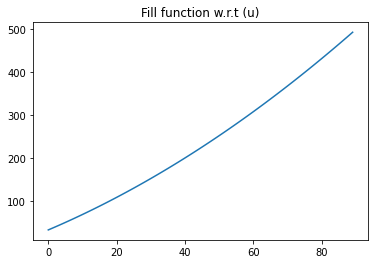

In [3]:
newu = np.arange(1, 10, 0.1)
plt.title('Fill function w.r.t (u)')
plt.plot(fill(newu).value)
plt.show()

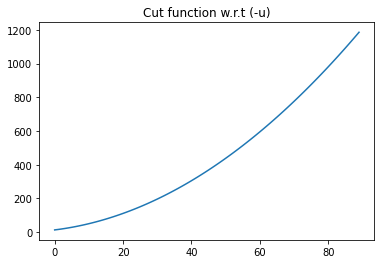

In [4]:
plt.title('Cut function w.r.t (-u)')
plt.plot(cut(-newu).value)
plt.show()